<img src="../../predictioNN_Logo_JPG(72).jpg" width=200>

---

## Prediction Error Measurement


### Introduction to Data Science
#### Last Updated: November 28, 2022
---  

### OBJECTIVES
- Understand the different kinds of errors in a binary classification task, and how to compute them.
- Understand different ways of measuring prediction accuracy
- Understand errors in a regression model and root mean squared error
- Compute root mean squared error

### CONCEPTS

- prediction error
- false positive
- false negative
- true positive
- true negative
- accuracy
- confusion matrix
- root mean squared error

---


## 1. Models Introduce Error

*All models are wrong, but some are useful*. George E. P. Box, statistician

We use models to simplify reality enough that it's useful: it solves a problem well enough while keeping errors acceptable. 

Some models estimate the probability of an event (for example, someone liking a movie).  
The higher this probability, the more confident we are that the viewer will like it.  
We can make a decision by:

- setting a threshold like 0.5
- compare the probability to the threshold
- if the probability > threshold, then alert (value=1), otherwise no alert (value=0)

When an alert is triggered, we call this a **predicted positive**. Otherwise it is a **predicted negative**.     
In each case, the alert may be warranted (**positive**) or not (**negative**).  
This **confusion matrix** organizes the four possible outcomes:

|Predicted / Actual| Positive      | Negative |
| -----------     | ----------- | ----------- |
| Positive        | True Positive | False Positive       |
| Negative      | False Negative   | True Negative        |

There are two possible errors:  
When the actual result is positive and the prediction is negative, this is a **false negative**.  
When the actual result is negative and the prediction is positive, this is a **false positive**.  

There are two possible correct predictions:  
When the actual result is positive and the prediction is positive, this is a **true positive**.  
When the actual result is negative and the prediction is negative, this is a **true negative**.  

For each case below, think about the errors and discuss which is worse.

---

1) A health monitoring system alerts that a patient is likely to have a heart attack  
 
a. Giving the alert when there is no real risk (**false positive**)  
b. Not given the alert when there IS a real risk (**false negative**)

ANS: ____

---

2) A COVID test
 
a. A positive result when the person does not have COVID (**false positive**)  
b. A negative result when the person has COVID (**false negative**)

ANS: ____

---

3) A recommender system suggests a movie to a viewer
 
a. Recommending a movie that the viewer does not like (**false positive**)  
b. Not recommending a movie that the viewer would have liked (**false negative**)

ANS: ____

---


## 2. Measuring Error

### 2A. Binary Classification

The examples we considered are all **binary classification systems**: they produce a signal or they don't (two values).  
We can summarize their effectiveness with statistics including:

- accuracy = #correct / #total  
  Accuracy is the fraction of correct predictions. 
  
- recall = #true_positive / #actual_positive  
  Recall is the fraction of positive cases that are predicted to be positive.

- precision = #true_positive / #predicted_positive  
  Precision represents the fraction of predicted positive cases that are positive
  
**Recall and precision should be used together**  
The system can predict that every case will positive, getting 100% recall. This would not be very useful, however, due to the false positives. For this reason, precision should accompany recall.

On the other hand, a system can be careful to only predict positive cases when highly confident. The precision would then be very high. However, it might fail to identify a lot of positive cases. For this reason, recall should accompany precision.

---

**TRY FOR YOURSELF**

4) Fifty people are tested for COVID.  
The test predicts that 10 people have COVID.  Of those 10 people, 6 actually have COVID.  
The test predicts that 40 people do not have COVID. Of those 40 people, three actually have COVID.  
Calculate the following:  
- accuracy
- recall
- precision


answer  
accuracy = (6 true positive + 37 true negative) / 50 total = 0.86

recall = 6 true positive / (6 true positive + 3 false negative) = 0.67

precision = 6 true positive / 10 predicted positive = 0.6

---

### 2B. Multiclass Classification

Let's think about a model M1 that reads reviews that look like this:

- This place has the best pizza!!  
- The tacos here are AWFUL  
- The chicken wings are...meh

and it assigns them a sentiment score 1(NEGATIVE) / 2(NEUTRAL) / 3(POSITIVE)

- [2] This place has the best pizza!!  
- [1] The tacos here are AWFUL  
- [2] The chicken wings are...meh

Now let's look at the results from a competing model M2:

- [1] This place has the best pizza!!  
- [1] The tacos here are AWFUL  
- [2] The chicken wings are...meh

---

**TRY FOR YOURSELF**

5) How did M1 do?

ans: if we count a prediction that matches actual to be correct, and otherwise incorrect, then it gets 2/3 correct (this is accuracy).

6) How did M2 do? 

ans: if we count a prediction that matches actual to be correct, and otherwise incorrect, then it gets 2/3 correct (this is accuracy).

7) Which model is better?

**Important point: "better" will depend on how you measure what is correct/incorrect.**  
If the answer is 3, is a prediction of 2 better than a prediction of 1?

Think about how you might measure accuracy for each model.

ans: if we count a prediction that doesn't match actual to be incorrect, then the models perform the same.  
if we penalize more when the prediction is further from actual, then M1 is better.

For example we might compute the absolute difference between predictions and actual. Then we could add the absolute differences. Lower is better.

For M1, sum of absolute difference is |3-2| = 1    
For M2, sum of absolute difference is |3-1| = 2  

---

### 2C. Regression

Regression models produce an output with continuous values, such as the predicted value of a house.

This is very different from the binary classifier which handles an outcome with two possible values, and the multiclass classifier which handles an outcome with several values.

The closer the prediction is to the true value, the better.

Next, we look at some house prices, a model that predicts the price, and the prediction errors.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
housing_datafile = '../datasets/ames_housing.csv'

In [4]:
housing = pd.read_csv(housing_datafile)
housing.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0


Let's look at the data columns. Many of them describe the condition and attributes of the houses.

In [5]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

The target variable is **SalePrice**  

In [6]:
target = 'SalePrice'

Plot SalePrice against some potential predictors

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

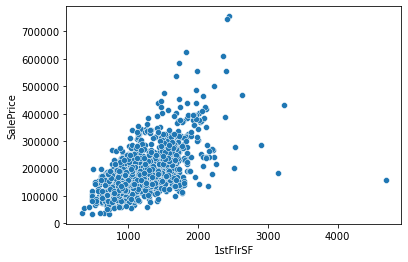

In [7]:
sns.scatterplot(x='1stFlrSF', y=target, data=housing)

**8) What do you notice about the relationship between SalePrice and 1stFlrSF?**

ans: there is a linear relationship, but there is large variation. There are also outliers far to the right.

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

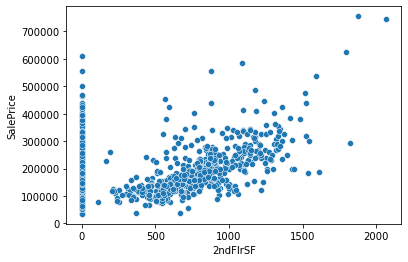

In [8]:
sns.scatterplot(x='2ndFlrSF', y=target, data=housing)

**9) What do you notice about the relationship between SalePrice and 2ndFlrSF?**

The relationship is linear but many points have 2ndFlrSF value of zero.

**10) What do all the zeroes mean on the x-axis?**

Ans: These are homes without a 2nd floor. Since other variables explain SalePrice, there will be a range of different SalePrices when there isn't a second floor.

Next we fit some simple models (in practice, scaling the data is recommended).

In [1]:
# import packages

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

sklearn models require that data are in arrays. We extract the arrays and make them columns.

In [11]:
X = housing['1stFlrSF'].values.reshape(-1,1)
y = housing[target].values.reshape(-1,1)

reg1 = LinearRegression().fit(X, y)

compute predictions and errors (actual - prediction)

In [135]:
preds = reg1.predict(X)
errors = y - preds

Make a histogram of the errors.

<AxesSubplot:ylabel='Count'>

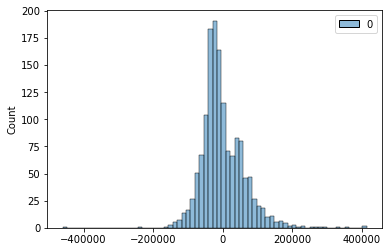

In [136]:
sns.histplot(errors)

**11) There are positive and negative errors. What do these mean?**

ans: since error = actual - predicted, positive errors are when predicted is less than actual, and negative errors are when predicted is more than actual.

Next we compute the mean squared error, which is the average of the squared errors.  
By using squared errors, this avoids positive and negative errors cancelling.

In [137]:
mse = mean_squared_error(y, preds)
mse

3991838509.3767366

Lastly, we compute the root mean squared error (rmse). This inverts the squaring, and gives the average error.

In [138]:
math.sqrt(mse)

63180.99800871094

**12) The average error is 63,000. Is this large? How can you think about this?**

Answer: For reference, the average sale price is 

In [140]:
housing[target].mean()

180921.19589041095

The average error is 35% of the average home price, which is large.

In [141]:
63180.99800871094 / 180921.19589041095

0.34921833065364793

---

**TRY FOR YOURSELF**

13) Fit a linear regression model using `2ndFlrSF` as a predictor and `SalePrice` as the target.  
Compute the rmse.  How does this compare to the rmse from the model using `1stFlrSF`?  
From what you know about the scatterplots, does this make sense?

In [144]:
# answer

X2 = housing['2ndFlrSF'].values.reshape(-1,1)
reg2 = LinearRegression().fit(X2, y)
preds2 = reg2.predict(X2)
math.sqrt(mean_squared_error(y, preds2))


75257.28959073259

It makes sense the 2ndFlrSF regression model has higher rmse. For example the 2ndFlrSF scatterplot does not have as strong a linear relationship to SalePrice as the 1stFlrSF scatterplot.

---